In [57]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

eps = 1.e-30

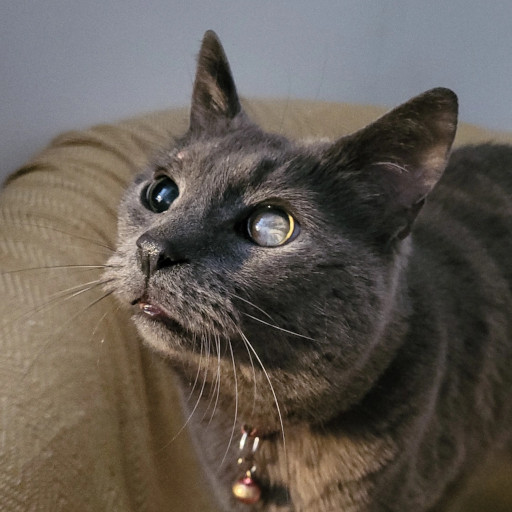

In [58]:
image = np.array(Image.open('pops_512.jpg'))
display(Image.fromarray(image, mode='RGB'))

r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]

In [59]:
x, y = image.shape[1], image.shape[0]
e_x, e_y = 100, 100

bbox = (
    (x/2)-(e_x/2),
    (y/2)-(e_y/2),
    (x/2)+(e_x/2),
    (y/2)+(e_y/2),
)

high_pass = Image.new("L", (x, y), color=1)

high_pass_draw = ImageDraw.Draw(high_pass)
high_pass_draw.ellipse(bbox, fill=0)

high_pass_np = np.array(high_pass).astype(np.float64)
high_pass_np /= np.max(high_pass_np)

In [60]:
def prepare(arr, sf=1):
    return np.clip(arr * sf, 0, 255).astype(np.uint8)

In [61]:
F_r = np.fft.fftshift(np.fft.fft2(r))
F_g = np.fft.fftshift(np.fft.fft2(g))
F_b = np.fft.fftshift(np.fft.fft2(b))

F_r_filt = F_r * high_pass_np
F_g_filt = F_g * high_pass_np
F_b_filt = F_b * high_pass_np

r_filt = np.fft.ifft2(np.fft.ifftshift(F_r_filt)).real
g_filt = np.fft.ifft2(np.fft.ifftshift(F_g_filt)).real
b_filt = np.fft.ifft2(np.fft.ifftshift(F_b_filt)).real

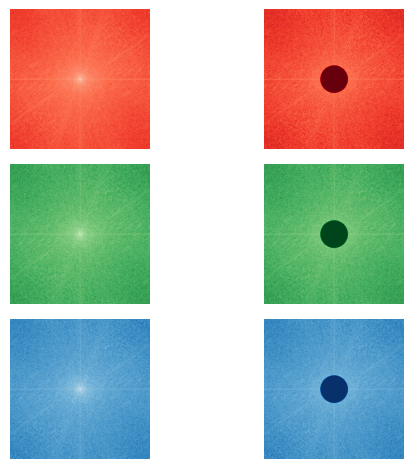

In [62]:
fig, axs = plt.subplots(3, 2)

fig.patch.set_visible(False)

for ax in axs.ravel():
    ax.axis('off')

axs[0, 0].imshow(prepare(np.log(np.abs(F_r)), sf=15), cmap='Reds_r', vmin=0, vmax=255)
axs[0, 1].imshow(prepare(np.log(np.abs(F_r_filt.real + eps)), sf=15), cmap='Reds_r', vmin=0, vmax=255)
axs[1, 0].imshow(prepare(np.log(np.abs(F_g.real)), sf=15), cmap='Greens_r', vmin=0, vmax=255)
axs[1, 1].imshow(prepare(np.log(np.abs(F_g_filt.real + eps)), sf=15), cmap='Greens_r', vmin=0, vmax=255)
axs[2, 0].imshow(prepare(np.log(np.abs(F_b.real)), sf=15), cmap='Blues_r', vmin=0, vmax=255)
axs[2, 1].imshow(prepare(np.log(np.abs(F_b_filt.real + eps)), sf=15), cmap='Blues_r', vmin=0, vmax=255)

plt.tight_layout()
plt.show()

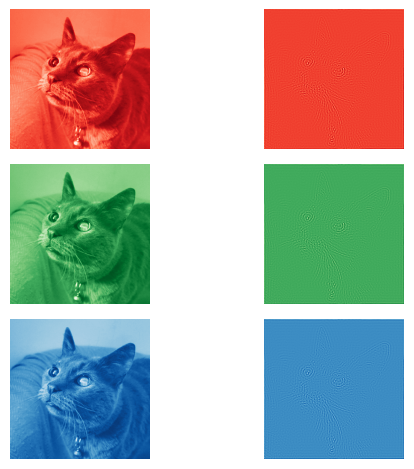

In [63]:
fig, axs = plt.subplots(3, 2)

fig.patch.set_visible(False)

for ax in axs.ravel():
    ax.axis('off')

axs[0, 0].imshow(r, cmap='Reds_r')
axs[0, 1].imshow(r_filt, cmap='Reds_r')
axs[1, 0].imshow(g, cmap='Greens_r')
axs[1, 1].imshow(g_filt, cmap='Greens_r')
axs[2, 0].imshow(b, cmap='Blues_r')
axs[2, 1].imshow(b_filt, cmap='Blues_r')

plt.tight_layout()
plt.show()

/var/folders/h3/rhgxf73j6bs8tprtj4q3215m0000gn/T/ipykernel_7318/370431478.py:2: RuntimeWarning: divide by zero encountered in log
  fft_filt = prepare(np.log(np.abs(np.dstack((F_r_filt, F_g_filt, F_b_filt)))), sf=15)


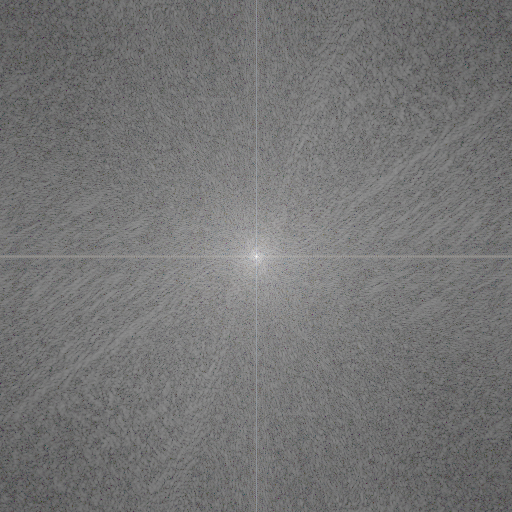

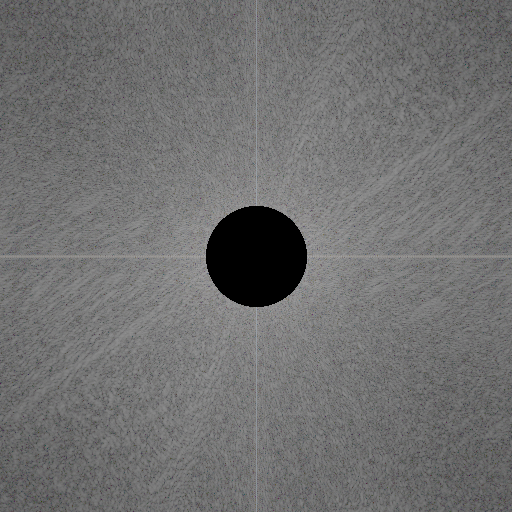

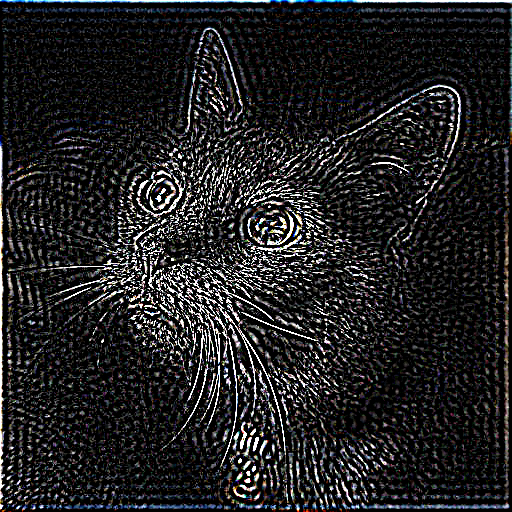

In [64]:
fft_orig = prepare(np.log(np.abs(np.dstack((F_r, F_g, F_b)))), sf=15)
fft_filt = prepare(np.log(np.abs(np.dstack((F_r_filt, F_g_filt, F_b_filt)))), sf=15)
image_filt = prepare(np.dstack((r_filt, g_filt, b_filt)), sf=15)

display(Image.fromarray(fft_orig, mode='RGB'))

img = Image.fromarray(fft_filt, mode='RGB')
display(img)
img.save("output/pops_high_pass_fft.png")

img = Image.fromarray(image_filt, mode='RGB')
display(img)
img.save("output/pops_high_pass.png")